In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
dataset = pd.read_csv("Kruk_VLagun_156.csv")

In [6]:
dataset.shape

(156, 30)

In [39]:
dataset.describe()

,PSU,O2,SecchDisc,temp.,SS,chla,SRP,DOP,PP,TP,...,DOC,TPOC,PhytoBiomassC,CyanobacteriaBiomassC,ChlorophyceaeBiomassC,DiatomsBiomassC,PicoplanktonBiomassC,Airtemperature,Windspeedinsitu,Depth
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,...,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,3.356954,10.180705,0.376026,17.350000,86.937115,58.011474,15.034615,22.421154,134.547436,172.003205,...,8.206301,9.706078,2.129615,0.709808,0.592436,0.112115,0.619231,19.450000,4.985897,3.024359
std,0.758865,1.078504,0.115147,3.122251,35.506823,33.122486,11.842344,19.531893,51.210224,51.697205,...,1.025776,2.589192,0.888037,0.530066,0.309028,0.118436,0.337919,4.912624,2.621043,0.538501
min,1.400000,7.620000,0.200000,10.600000,29.000000,0.000000,0.000000,0.700000,20.900000,61.300000,...,6.457500,3.916500,0.480000,0.020000,0.100000,0.000000,0.080000,11.000000,0.000000,1.500000
25%,2.800000,9.367500,0.300000,16.200000,60.000000,32.760000,7.475000,9.000000,99.950000,133.050000,...,7.409525,8.040000,1.580000,0.240000,0.370000,0.030000,0.350000,15.950000,3.000000,2.700000
50%,3.379124,9.955000,0.350000,17.900000,80.000000,53.515000,12.250000,15.750000,131.500000,168.650000,...,8.044000,9.414100,2.085000,0.630000,0.535000,0.075000,0.610000,20.250000,5.000000,3.200000
75%,3.957258,10.890000,0.450000,20.100000,111.562500,81.910000,19.875000,30.825000,167.700000,206.800000,...,8.842500,11.387875,2.690000,1.022500,0.762500,0.150000,0.860000,22.125000,6.850000,3.400000
max,4.600000,12.890000,0.700000,20.700000,217.500000,170.370000,88.200000,91.100000,285.100000,327.600000,...,10.860000,17.420000,4.840000,2.860000,1.970000,0.760000,1.390000,33.200000,11.500000,3.900000


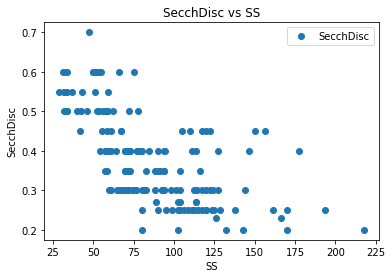

In [17]:
dataset.plot(x='SS',y='SecchDisc',style='o')
plt.title("SecchDisc vs SS")
plt.xlabel("SS")
plt.ylabel("SecchDisc")
plt.show()

<AxesSubplot:xlabel='SecchDisc', ylabel='Count'>

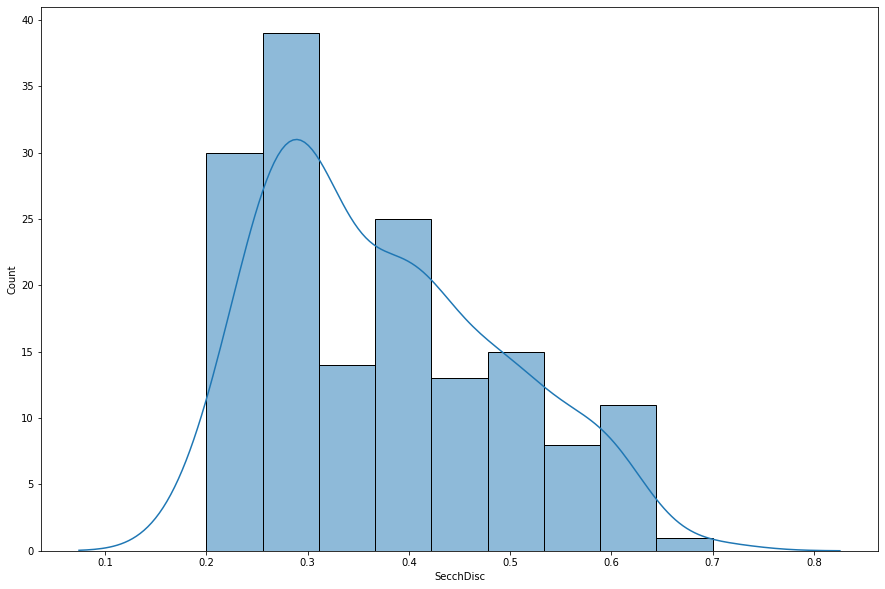

In [40]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.histplot(dataset['SecchDisc'], kde=True, kde_kws=dict(cut=3))

In [21]:
X=dataset['SS'].values.reshape(-1,1)
y=dataset['SecchDisc'].values.reshape(-1,1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=0)

In [23]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [25]:
print(regressor.intercept_)
print(regressor.coef_)

[0.55338577]
[[-0.00201303]]


In [26]:
y_pred=regressor.predict(X_test)

In [27]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,0.50,0.397376
1,0.30,0.400979
2,0.40,0.432604
3,0.23,0.218720
4,0.70,0.457767
5,0.50,0.436630
6,0.30,0.409595
7,0.20,0.347050
8,0.30,0.420023
9,0.40,0.383708


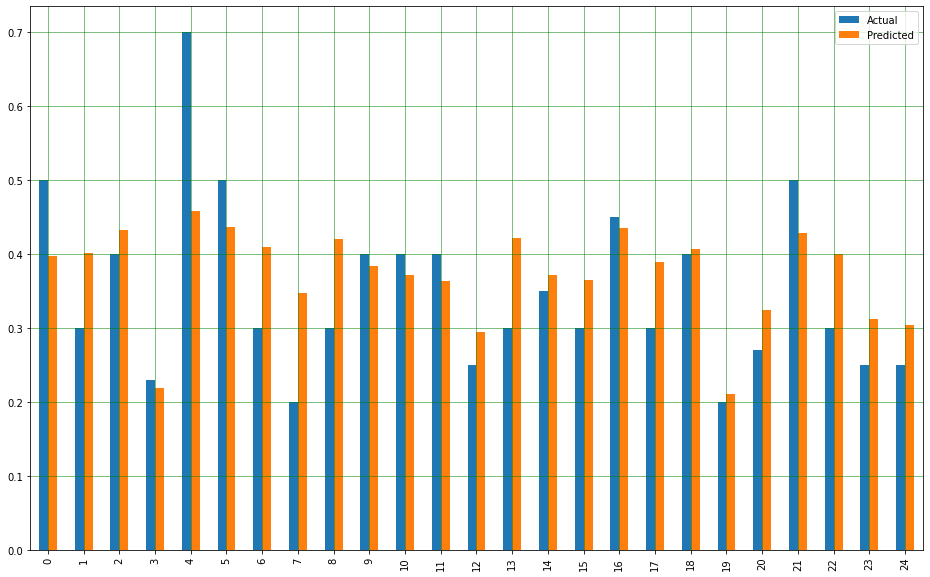

In [33]:
df1 = df.head(25)
df1.plot(kind='bar', figsize=(16,10))
plt.grid(which='major',linestyle="-",linewidth='.5', color='green')
plt.grid(which='minor',linestyle=":",linewidth='.5', color='black')
plt.show()

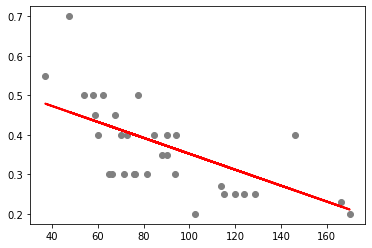

In [30]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color="red", linewidth=2)
plt.show()

In [32]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.06680798903466384
Mean Squared Error: 0.007028533268056228
Root Mean Squared Error: 0.08383634813167991
